# Load Data From Kaggle
Dataset from outside:
https://www.kaggle.com/muhammadkhalid/sign-language-for-numbers

https://www.kaggle.com/ahmedkhanak1995/sign-language-gesture-images-dataset 

https://drive.google.com/drive/folders/1veEF-oewY4_qp_sjFi6pjZoRMRyhaBv_?usp=sharing
From https://lttm.dei.unipd.it/downloads/gesture/

Our own Dataset:
https://www.kaggle.com/nabilahnran/number-hand-gesture

Install Kaggle to load data from there

In [1]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/home/jupyter/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-05-29 17:43:56           6349        568  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           3656        305  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           

In [2]:
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers
!kaggle datasets download -d ahmedkhanak1995/sign-language-gesture-images-dataset

sign-language-for-numbers.zip: Skipping, found more recently modified local copy (use --force to force download)
sign-language-gesture-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Extract ZIP datas from kaggle that have been loaded

In [3]:
import zipfile
handgesture1 = 'sign-language-for-numbers.zip'
handgesture2 = 'sign-language-gesture-images-dataset.zip'

zip_ref = zipfile.ZipFile(handgesture1, 'r')
zip_ref.extractall('/tmp/sign-language-for-numbers')
zip_ref = zipfile.ZipFile(handgesture2, 'r')
zip_ref.extractall('/tmp/sign-language-gesture-images-dataset')
zip_ref.close()

In [4]:
!ls

danbam_model.ipynb  sign-language-for-numbers.zip
danbam_tech	    sign-language-gesture-images-dataset.zip


In [5]:
import os
num= ['0','1','2','3','4','5']
def countImage(pathFolder):
  totalval1=0
  for a in os.listdir(pathFolder):
    if a in num:
      total=len(os.listdir(os.path.join(pathFolder, a)))
      totalval1=totalval1+total
  print("total image in folder " + pathFolder+ " : " + str(totalval1))

print("this number of image below just contain hand number image")
countImage('/tmp/sign-language-for-numbers/Sign Language for Numbers')
countImage('/tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data')
countImage('/home/jupyter/danbamtech/danbam_tech/CROP Hand Gesture Kelompok')

this number of image below just contain hand number image
total image in folder /tmp/sign-language-for-numbers/Sign Language for Numbers : 9000
total image in folder /tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data : 9000
total image in folder /home/jupyter/danbamtech/danbam_tech/CROP Hand Gesture Kelompok : 2141


Make destination directory, divided into training and validation directory

In [6]:
for i in num:
  data= os.path.join("/tmp/datas/training", i)
  os.makedirs(data, exist_ok=True)
for i in num:
  data= os.path.join("/tmp/datas/validation", i)
  os.makedirs(data, exist_ok=True)

Copy the datas into the destination directory

In [7]:
import random
print(data)
import shutil
import os
def joinImage(path_folder, split):
  for i in os.listdir(path_folder):
    if i in num:
      p=os.path.join(path_folder,i)
      tmp=os.listdir(p)
      tmpp = random.sample(tmp, len(tmp))
      if split=='training':
        for a in tmpp:
          p1=os.path.join(p, a)
          des_path=os.path.join('/tmp/datas/training', i)
          shutil.copy2(p1, des_path)
      else:
        length=int(len(os.listdir(p))/10)
        for a in tmpp[length:]:
          p1=os.path.join(p, a)
          des_path=os.path.join('/tmp/datas/training', i)
          shutil.copy2(p1, des_path)
        for a in tmpp[:length]:
          p1=os.path.join(p, a)
          des_path=os.path.join('/tmp/datas/validation', i)
          shutil.copy2(p1, des_path)
          

joinImage('/tmp/sign-language-for-numbers/Sign Language for Numbers', 'training')
joinImage('/tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data','training')
joinImage('/home/jupyter/danbamtech/danbam_tech/CROP Hand Gesture Kelompok', 'validation')


/tmp/datas/validation/5


In [8]:
for t in num:
  if t in num:
    hg1=os.listdir(os.path.join('/home/jupyter/danbamtech/danbam_tech/CROP Hand Gesture Kelompok', t))
    hg2=os.listdir(os.path.join('/tmp/sign-language-for-numbers/Sign Language for Numbers', t))
    hg3=os.listdir(os.path.join('/tmp/sign-language-gesture-images-dataset/Gesture Image Pre-Processed Data', t))
   
    print("hand gesture dir training" + t)
    print("in previous folder: "+ str(len(hg2+hg3)))
    pth1=os.path.join('/tmp/datas/training', t)
    cba=os.listdir(pth1)
    print("in current folder:" +str(len(cba)))
    print('\n')

    print("hand gesture dir validation" + t)
    print("in previous folder: "+ str(len(hg1)))
    pth1=os.path.join('/tmp/datas/validation', t)
    cba=os.listdir(pth1)
    print("in current folder:" +str(len(cba)))
    print('\n')




hand gesture dir training0
in previous folder: 3000
in current folder:3292


hand gesture dir validation0
in previous folder: 324
in current folder:32


hand gesture dir training1
in previous folder: 3000
in current folder:3333


hand gesture dir validation1
in previous folder: 370
in current folder:37


hand gesture dir training2
in previous folder: 3000
in current folder:3317


hand gesture dir validation2
in previous folder: 352
in current folder:35


hand gesture dir training3
in previous folder: 3000
in current folder:3321


hand gesture dir validation3
in previous folder: 356
in current folder:35


hand gesture dir training4
in previous folder: 3000
in current folder:3350


hand gesture dir validation4
in previous folder: 388
in current folder:38


hand gesture dir training5
in previous folder: 3000
in current folder:3316


hand gesture dir validation5
in previous folder: 351
in current folder:35




In [9]:
totaltrain=0
totalval=0
for a in os.listdir('/tmp/datas/training'):
  total=len(os.listdir(os.path.join('/tmp/datas/training', a)))
  totaltrain=totaltrain+total
for a in os.listdir('/tmp/datas/validation'):
  total=len(os.listdir(os.path.join('/tmp/datas/validation', a)))
  totalval=totalval+total
print("total training data: "+str(totaltrain))
print("total validation data: "+str(totalval))

total training data: 19929
total validation data: 212


In [10]:
import tensorflow as tf
print(tf.__version__)

2.4.1


Build the model

In [11]:
model= tf.keras.Sequential([
                    
                            tf.keras.layers.Conv2D(16, (3,3), input_shape=(50,50,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

Processing data with Image Data Generator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_dir = '/tmp/datas/training'
validation_dir= '/tmp/datas/validation'


train_datagen= ImageDataGenerator(rescale=1/255,
                                  horizontal_flip = True,
                                  )
train_generator=train_datagen.flow_from_directory(
    training_dir,
    target_size=(50,50),
    batch_size=10,
    class_mode='categorical',
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (50,50),
    batch_size = 10,
    class_mode = 'categorical',
)

Found 19929 images belonging to 6 classes.
Found 212 images belonging to 6 classes.


Training Data

In [14]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1993/1993 [==============================] - 152s 76ms/step - loss: 0.8508 - accuracy: 0.6707 - val_loss: 1.0100 - val_accuracy: 0.6557
Epoch 2/10
1993/1993 [==============================] - 147s 74ms/step - loss: 0.2846 - accuracy: 0.9021 - val_loss: 0.7849 - val_accuracy: 0.7028
Epoch 3/10
1993/1993 [==============================] - 148s 74ms/step - loss: 0.1574 - accuracy: 0.9473 - val_loss: 0.7672 - val_accuracy: 0.7217
Epoch 4/10
1993/1993 [==============================] - 148s 74ms/step - loss: 0.1096 - accuracy: 0.9659 - val_loss: 0.7496 - val_accuracy: 0.8019
Epoch 5/10
1993/1993 [==============================] - 147s 74ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 1.2524 - val_accuracy: 0.6745
Epoch 6/10
1993/1993 [==============================] - 147s 74ms/step - loss: 0.0647 - accuracy: 0.9790 - val_loss: 0.8584 - val_accuracy: 0.7642
Epoch 7/10
1993/1993 [==============================] - 148s 74ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0

Plot Training and Validation Result

Text(0.5, 1.0, 'Training and validation loss')

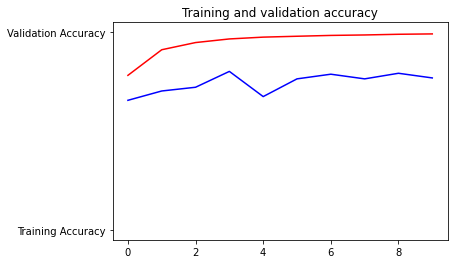

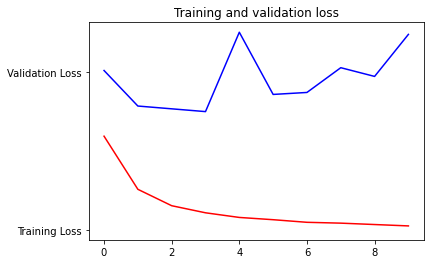

In [15]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Test the model

In [16]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image
# from PIL import ImageOps

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(50,50))
#   img=ImageOps.grayscale(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
  
 
#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0][0]==1:
#     print(fn + " is zero")
#   elif classes[0][1]==1:
#     print(fn + " is one")
#   elif classes[0][2]==1:
#     print(fn + " is two")
#   elif classes[0][3]==1:
#     print(fn + " is three")
#   elif classes[0][4]==1:
#     print(fn + " is four")
#   elif classes[0][5]==1:
#     print(fn + " is five")


In [22]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
from pathlib import Path
import pathlib
import tensorflow as tf

export_dir = '/home/jupyter/saved_model'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the model.
tflite_model_file = pathlib.Path('/home/jupyter/danbamfix.tflite')
tflite_model_file.write_bytes(tflite_model)


INFO:tensorflow:Assets written to: /home/jupyter/saved_model/assets


2009112